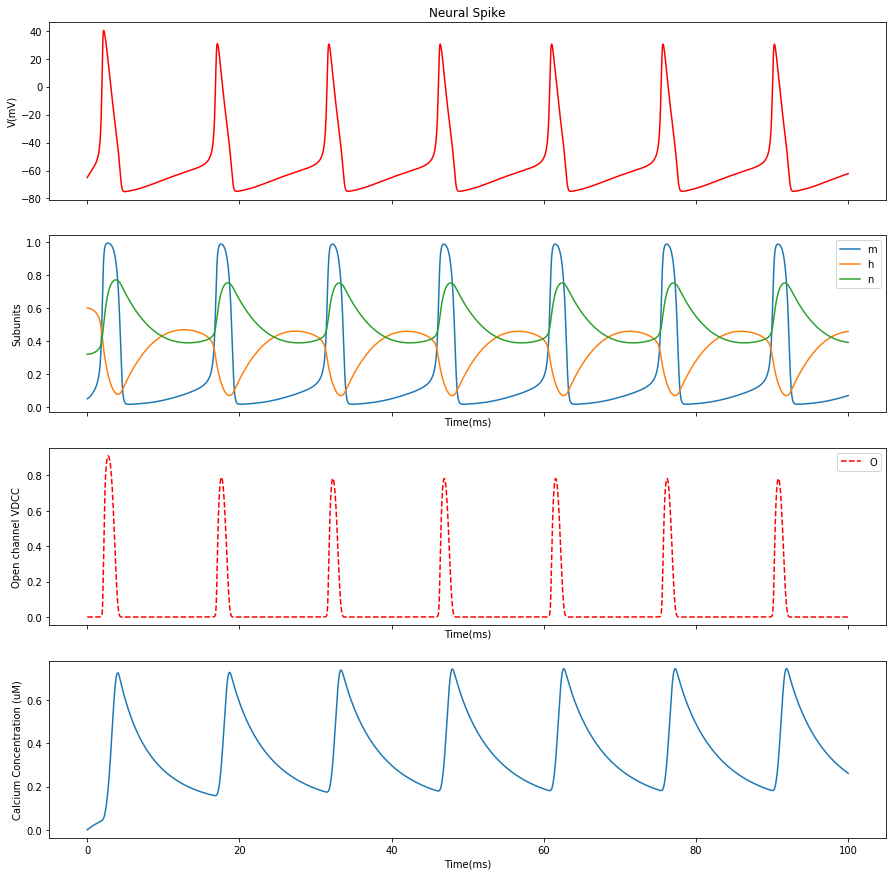

In [52]:
'''This model is the amalgamation of the classic Hodgkin-Huxley model, the Voltage dependent Calcium Channels (VDCCs) model, the presysnaptic calcium sensor Synaptotagmin
(dual calcium sensor model) and the calcium buffers Calbindin and PMCA. The voltage output generated by the Hodgkin-Huxley model acts as an input for the VDCCs. This
voltage is responsible for the opening of the VDCCs. The VDCCs are modeleld according to the 5 state model described by Bischofberger et., al 2010. Once the VDCCs open up,
the calcium ions are released from the the vesicles. These Calcium ions are sensed by the pre-synaptic calcium sensor Synaptotagmin. The synaptotagmin is modeled according
to the model described by Nadkarni et., al 2010. The synaptotagmin model is also called as dual sensor calcium model in which there are 7 states. 5 are for the synchronous
release of the vesicles, whereas 2 are for the asynchronous release. To control the calcium concentration, buffers such as Calbindin and PMCA are added in the model which
are adapted from the work of Nadkarni et., al 2010.'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining the HH model kinetics
Cm = 1.0   #uF/cm^2
gK = 36.0  #mS/cm^2
gNa = 120.0 #mS/cm^2
gl = 0.3  #mS/cm^2
VK = -77.0  #mV
VNa = 50.0  #mV
Vl = -54.4  #mV

#Dual sensor Calcium model kinetics
ks_plus = 0.612e-01  #/uM/ms
ks_minus = 2.32  #/ms
ka_plus = 3.82e-03   #/uM/ms
ka_minus = 13e-03   #/ms
b = 0.25
gamma = 2   #/ms
delta = 0.417e-06  #/ms
epsilon = 6.34 #ms
a = 0.025
z = 2  #Charge of Calcium ion
F = 96480  #C/mol (Faraday Constant)
Vol = 1       #um^3

#PMCA kinetics
kpm1 = 1.5e-01   #/uM/ms
kpm2 = 20e-03     #/ms
kpm3 = 100e-03     #/ms
kpm4 = 1e02    #/ms
kpm_leak = 12.5e-03   #/ms

#Calbindin kinetics
kh_plus = 1.1e-02 #/uM/ms
kh_minus = 2.6e-03    #/ms
km_plus = 8.7e-02 #/uM/ms
km_minus = 35.8e-03   #/ms

# Function that will store variables associated with sodium channel
def Sodium_values(V):
    
    alpha_m = (0.1*(V + 40.0))/(1.0 - np.exp(-(V + 40.0)/10.0))
    beta_m = 4.0*np.exp(-(V + 65.0)/18.0)
    alpha_h = 0.07 * np.exp(-(V + 65.0)/20.0)
    beta_h = 1.0/(1.0 + np.exp(-(V + 35.0)/10.0))
    m_initial = alpha_m/(alpha_m + beta_m)
    h_initial = alpha_h/(alpha_h + beta_h)
    
    return [alpha_m,beta_m,alpha_h,beta_h,m_initial,h_initial]

# Function that will store variables associated with Pottasium channel
def Potassium_values(V):
    
    alpha_n = (0.01*(V + 55.0))/(1 - np.exp(-(V + 55.0)/10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0)/80.0)
    n_initial = alpha_n/(alpha_n + beta_n)
    
    return [alpha_n,beta_n,n_initial]

# Function that will store variables associated with Calcium channel
def Calcium_values(V):
    
    alpha_1 = 4.04*np.exp(V/49.14)
    alpha_2 = 6.7*np.exp(V/42.08)
    alpha_3 = 4.39*np.exp(V/55.31)
    alpha_4 = 17.33*np.exp(V/26.55)
    beta_1 = 2.88*np.exp(-V/49.14)
    beta_2 = 6.3*np.exp(-V/42.08)
    beta_3 = 8.16*np.exp(-V/55.31)
    beta_4 = 1.84*np.exp(-V/26.55)
    
    return [alpha_1,alpha_2,alpha_3,alpha_4,beta_1,beta_2,beta_3,beta_4]

#Giving an external current
def I_ext(t):
    return 10    #nA

def f(V):
    C = 80.36    #mV
    D = 0.3933
    P = -3.003   #pA/mV
    I = P*V*(D - np.exp(-V/C))/(1 - np.exp(V/C))*1e03
    return I

# Defining the model that will run the simulation
def model(y,t):
    dy = np.zeros((58,))
    V = y[0]            
    m = y[1]            
    h = y[2]            
    n = y[3]                     
    C0 = y[4]           
    C1 = y[5]           
    C2 = y[6]           
    C3 = y[7]           
    O = y[8]            
    S0A0 = y[9]
    S1A0 = y[10]
    S2A0 = y[11]
    S3A0 = y[12]
    S4A0 = y[13]
    S5A0 = y[14]
    S0A1 = y[15]
    S1A1 = y[16]
    S2A1 = y[17]
    S3A1 = y[18]
    S4A1 = y[19]
    S5A1 = y[20]
    S0A2 = y[21]
    S1A2 = y[22]
    S2A2 = y[23]
    S3A2 = y[24]
    S4A2 = y[25]
    S5A2 = y[26]
    S0A0_s = y[27]
    S1A0_s = y[28]
    S2A0_s = y[29]
    S3A0_s = y[30]
    S4A0_s = y[31]
    S5A0_s = y[32]
    S0A1_s = y[33]
    S1A1_s = y[34]
    S2A1_s = y[35]
    S3A1_s = y[36]
    S4A1_s = y[37]
    S5A1_s = y[38]
    S0A2_s = y[39]
    S1A2_s = y[40]
    S2A2_s = y[41]
    S3A2_s = y[42]
    S4A2_s = y[43]
    S5A2_s = y[44]
    PMCA0 = y[45]
    PMCA1 = y[46]
    PMCA2 = y[47]
    H0M0 = y[48]
    H1M0 = y[49]
    H2M0 = y[50]
    H0M1 = y[51]
    H1M1 = y[52]
    H2M1 = y[53]
    H0M2 = y[54]
    H1M2 = y[55]
    H2M2 = y[56]
    Ca = y[57]
    
    [alpha_n,beta_n,n_initial] = Potassium_values(V)
    [alpha_m,beta_m,alpha_h,beta_h,m_initial,h_intial] = Sodium_values(V)
    [alpha_1,alpha_2,alpha_3,alpha_4,beta_1,beta_2,beta_3,beta_4] = Calcium_values(V)
    I = f(V)
    
    dy[0] = (I_ext(t)/Cm) - ((gK*np.power(n,4)*(V-VK))/(Cm)) - ((gNa*np.power(m,3)*h*(V-VNa))/(Cm)) - ((gl*(V-Vl))/Cm) 
    dy[1] = (alpha_m*(1-m)) - (beta_m*m)
    dy[2] = (alpha_h*(1-h)) - (beta_h*h)
    dy[3] = (alpha_n*(1-n)) - (beta_n*n)
    dy[4] = (beta_1*C1) - (alpha_1*C0)
    dy[5] = (alpha_1*C0 + beta_2*C2) - ((alpha_2 + beta_1)*C1) 
    dy[6] = (alpha_2*C1 + beta_3*C3) - ((alpha_3 + beta_2)*C2) 
    dy[7] = (alpha_3*C2 + beta_4*O) - ((alpha_4 + beta_3)*C3)
    dy[8] = (alpha_4*C3) - (beta_4*O)
    dy[9] = (ka_minus*S0A1)+(ks_minus*S1A0)+epsilon*(S0A0_s+S1A0_s+S2A0_s+S3A0_s+S4A0_s+S5A0_s+S0A1_s+S5A1_s+S0A2_s+S1A2_s+S2A2_s+S3A2_s+S4A2_s+S5A2_s)-(5*ks_plus*Ca+2*ka_plus*Ca+delta)*S0A0
    dy[10] = (5*ks_plus*Ca*S0A0)+(ka_minus*S1A1)+(2*b*ks_minus*S2A0)-(ks_minus+2*ka_plus*Ca+4*ks_plus*Ca)*S1A0
    dy[11] = (4*ks_plus*Ca*S1A0)+(ka_minus*S2A1)+(3*b**2*ks_minus*S3A0)-(2*b*ks_minus+2*ka_plus*Ca+3*ks_plus*Ca)*S2A0
    dy[12] = (3*ks_plus*Ca*S2A0)+(ka_minus*S3A1)+(4*b**3*ks_minus*S4A0)-(3*b**2*ks_minus+2*ka_plus*Ca+2*ks_plus*Ca)*S3A0
    dy[13] = (2*ks_plus*Ca*S3A0)+(ka_minus*S4A1)+(5*b**4*ks_minus*S5A0)-(4*b**3*ks_minus+2*ka_plus*Ca+ks_plus*Ca)*S4A0
    dy[14] = (ks_plus*Ca*S4A0)+(ka_minus*S5A1)-(5*b**4*ks_minus+2*ka_plus*Ca+gamma)*S5A0
    dy[15] = (2*ka_plus*Ca*S0A0)+(ks_minus*S1A1)+(2*b*ka_minus*S0A2)-(ka_minus+5*ks_plus*Ca+ka_plus*Ca)*S0A1
    dy[16] = (5*ks_plus*Ca*S0A1)+(2*ka_plus*Ca*S1A0)+(2*b*ks_minus*S2A1)+(2*b*ka_minus*S1A2)-(ks_minus+ka_minus+4*ks_plus*Ca+ka_plus*Ca)*S1A1
    dy[17] = (4*ks_plus*Ca*S1A1)+(2*ka_plus*Ca*S2A0)+(3*b**2*ks_minus*S3A1)+(2*b*ka_minus*S2A2)-(2*b*ks_minus+ka_minus+3*ks_plus*Ca+ka_plus*Ca)*S2A1
    dy[18] = (3*ks_plus*Ca*S2A1)+(2*ka_plus*Ca*S3A0)+(4*b**3*ks_minus*S4A1)+(2*b*ka_minus*S3A2)-(3*b**2*ks_minus+ka_minus+2*ks_plus*Ca+ka_plus*Ca)*S3A1
    dy[19] = (2*ks_plus*Ca*S3A1)+(2*ka_plus*Ca*S4A0)+(5*b**4*ks_minus*S5A1)+(2*b*ka_minus*S4A2)-(4*b**3*ks_minus+ka_minus+ks_plus*Ca+ka_plus*Ca)*S4A1
    dy[20] = (ks_plus*Ca*S4A1)+(2*ka_plus*Ca*S5A0)+(2*b*ka_minus*S5A2)-(5*b**4*ks_minus+ka_minus+ka_plus*Ca+gamma)*S5A1
    dy[21] = (ka_plus*Ca*S0A1)+(ks_minus*S1A1)-(2*b*ka_minus+5*ks_plus*Ca+a*gamma)*S0A2
    dy[22] = (5*ks_plus*Ca*S0A2)+(ka_plus*Ca*S1A1)+(2*b*ks_minus*S2A2)-(ks_minus+2*b*ka_minus+4*ks_plus*Ca+a*gamma)*S1A2
    dy[23] = (4*ks_plus*Ca*S1A2)+(ka_plus*Ca*S2A1)+(3*b**2*ks_minus*S3A2)-(2*b*ks_minus+2*b*ka_minus+3*ks_plus*Ca+a*gamma)*S2A2
    dy[24] = (3*ks_plus*Ca*S2A2)+(ka_plus*Ca*S3A1)+(4*b**3*ks_minus*S4A2)-(3*b**2*ks_minus+2*b*ka_minus+2*ks_plus*Ca+a*gamma)*S3A2
    dy[25] = (2*ks_plus*Ca*S3A2)+(ka_plus*Ca*S4A1)+(5*b**4*ks_minus*S5A2)-(4*b**3*ks_minus+2*b*ka_minus+ks_plus*Ca+a*gamma)*S4A2
    dy[26] = (ks_plus*Ca*S4A2)+(ka_plus*Ca*S5A1)-(5*b**4*ks_minus+2*b*ka_minus+a*gamma+gamma)*S5A2
    dy[27] = (ka_minus*S0A1_s)+(ks_minus*S1A0_s)+(delta*S0A0)-(5*ks_plus*Ca+2*ka_plus*Ca+epsilon)*S0A0_s
    dy[28] = (5*ks_plus*Ca*S0A0_s)+(ka_minus*S1A1_s)+(2*b*ks_minus*S2A0_s)-(ks_minus+2*ka_plus*Ca+4*ks_plus*Ca+epsilon)*S1A0_s
    dy[29] = (4*ks_plus*Ca*S1A0_s)+(ka_minus*S2A1_s)+(3*b**2*ks_minus*S3A0_s)-(2*b*ks_minus+2*ka_plus*Ca+3*ks_plus*Ca+epsilon)*S2A0_s
    dy[30] = (3*ks_plus*Ca*S2A0_s)+(ka_minus*S3A1_s)+(4*b**3*ks_minus*S4A0_s)-(3*b**2*ks_minus+2*ka_plus*Ca+2*ks_plus*Ca+epsilon)*S3A0_s
    dy[31] = (2*ks_plus*Ca*S3A0_s)+(ka_minus*S4A1_s)+(5*b**4*ks_minus*S5A0_s)-(4*b**3*ks_minus+2*ka_plus*Ca+ks_plus*Ca+epsilon)*S4A0_s
    dy[32] = (ks_plus*Ca*S4A0_s)+(ka_minus*S5A1_s)+(gamma*S5A0)-(5*b**4*ks_minus+2*ka_plus*Ca+epsilon)*S5A0_s
    dy[33] = (2*ka_plus*Ca*S0A0_s)+(ks_minus*S1A1_s)+(2*b*ka_minus*S0A2_s)-(ka_minus+5*ks_plus*Ca+ka_plus*Ca+epsilon)*S0A1_s
    dy[34] = (5*ks_plus*Ca*S0A1_s)+(2*ka_plus*Ca*S1A0_s)+(2*b*ks_minus*S2A1_s)+(2*b*ka_minus*S1A2_s)-(ks_minus+ka_minus+4*ks_plus*Ca+ka_plus*Ca)*S1A1_s
    dy[35] = (4*ks_plus*Ca*S1A1_s)+(2*ka_plus*Ca*S2A0_s)+(3*b**2*ks_minus*S3A1_s)+(2*b*ka_minus*S2A2_s)-(2*b*ks_minus+ka_minus+3*ks_plus*Ca+ka_plus*Ca)*S2A1_s
    dy[36] = (3*ks_plus*Ca*S2A1_s)+(2*ka_plus*Ca*S3A0_s)+(4*b**3*ks_minus*S4A1_s)+(2*b*ka_minus*S3A2_s)-(3*b**2*ks_minus+ka_minus+2*ks_plus*Ca+ka_plus*Ca)*S3A1_s
    dy[37] = (2*ks_plus*Ca*S3A1_s)+(2*ka_plus*Ca*S4A0_s)+(5*b**4*ks_minus*S5A1_s)+(2*b*ka_minus*S4A2_s)-(4*b**3*ks_minus+ka_minus+ks_plus*Ca+ka_plus*Ca)*S4A1_s
    dy[38] = (ks_plus*Ca*S4A1_s)+(2*ka_plus*Ca*S5A0_s)+(2*b*ka_minus*S5A2_s)+(gamma*S5A1)-(5*b**4*ks_minus+ka_minus+ka_plus*Ca+epsilon)*S5A1_s
    dy[39] = (ka_plus*Ca*S0A1_s)+(ks_minus*S1A2_s)+(a*gamma*S0A2)-(2*b*ka_minus+5*ks_plus*Ca+epsilon)*S0A2_s
    dy[40] = (5*ks_plus*Ca*S0A2_s)+(ka_plus*Ca*S1A1_s)+(2*b*ks_minus*S1A2_s)+(a*gamma*S1A2)-(ks_minus+2*b*ka_minus+4*ks_plus*Ca+epsilon)*S1A2_s
    dy[41] = (4*ks_plus*Ca*S1A2_s)+(ka_plus*Ca*S2A1_s)+(3*b**2*ks_minus*S3A2_s)+(a*gamma*S2A2)-(2*b*ks_minus+2*b*ka_minus+3*ks_plus*Ca+epsilon)*S2A2_s
    dy[42] = (3*ks_plus*Ca*S2A2_s)+(ka_plus*Ca*S3A1_s)+(4*b**3*ks_minus*S4A2_s)+(a*gamma*S3A2)-(3*b**2*ks_minus+2*b*ka_minus+2*ks_plus*Ca+epsilon)*S3A2_s
    dy[43] = (2*ks_plus*Ca*S3A2_s)+(ka_plus*Ca*S4A1_s)+(5*b**4*ks_minus*S5A2_s)+(a*gamma*S4A2)-(4*b**3*ks_minus+2*b*ka_minus+ks_plus*Ca+epsilon)*S4A2_s
    dy[44] = (ks_plus*Ca*S4A2_s)+(ka_plus*Ca*S5A1_s)+(a*gamma+gamma)*S5A2-(5*b**4*ks_minus+2*b*ka_minus+epsilon)*S5A2_s
    dy[45] = (kpm2*PMCA1)+(kpm4*PMCA2)-(kpm1*PMCA0*Ca)
    dy[46] = (kpm1*PMCA0*Ca) - (kpm2+kpm3)*PMCA1
    dy[47] = (kpm3*PMCA1) - (kpm4*PMCA2)
    dy[48] = (kh_minus*H1M0)+(km_minus*H0M1)-(2*kh_plus+2*km_plus)*Ca*H0M0
    dy[49] = (2*kh_plus*Ca*H0M0)+(km_minus*H1M1)+(2*kh_minus*H2M0)-(kh_minus+2*km_plus+kh_plus*Ca)*H1M0
    dy[50] = (kh_plus*Ca*H1M0)+(km_minus*H2M1)-(2*kh_minus+2*km_plus*Ca)*H2M0
    dy[51] = (2*km_plus*Ca*H0M0)+(kh_minus*H1M1)+(2*km_minus*H0M2)-(km_minus+2*kh_plus*Ca+km_plus*Ca)*H0M1
    dy[52] = (2*kh_plus*Ca*H0M1)+(2*km_plus*Ca*H1M0)+(2*kh_minus*H2M1)+(2*km_minus*H1M2)-(kh_minus+km_minus+kh_plus*Ca+km_plus*Ca)*H1M1
    dy[53] = (kh_plus*Ca*H1M1)+(2*km_plus*Ca*H2M0)+(2*km_minus*H2M2)-(2*kh_minus+km_minus+km_plus*Ca)*H2M1
    dy[54] = (km_plus*Ca*H0M1)+(kh_minus*H1M2)-(2*km_minus+2*kh_plus*Ca)*H0M2
    dy[55] = (2*kh_plus*Ca*H0M2)+(km_plus*Ca*H1M1)+(2*kh_minus*H2M2)-(kh_minus+2*km_minus+kh_plus*Ca)*H1M2
    dy[56] = (kh_plus*Ca*H1M2)+(km_plus*Ca*H2M1)-(2*kh_minus+2*km_minus)*H2M2
    dy[57] = ((-I)/(z*F*Vol))*O + (kpm_leak*PMCA0)-(kpm1*PMCA0*Ca)+(kpm2*PMCA1) + (km_minus*(H2M1+H1M1+H0M1+2*(H2M2+H1M2+H0M2)))+(kh_minus*(H2M1+H1M1+H0M1+2*(H2M2+H2M1+H2M0)))
    -(km_plus*(H2M1+H1M1+H0M1+2*(H2M0+H1M0+H0M0)) + kh_plus*(H2M1+H1M1+H0M1+2*(H0M2+H0M1+H0M0)))*Ca
    return dy

#initialising parameters
y0 = [-65,0.05,0.6,0.32,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.80,0.1953,1.14,1.48e-05,7.0e-06,8.27e-07,1.21e-05,
      5.74e-06,6.79e-07,2.49e-06,1.18e-06,1.39e-07,100e-09]

#time range
t = np.arange(0.0,100.01,0.01)

#solving the set of ODEs
sol = odeint(model,y0,t)

#Plotting the output
fig, ax = plt.subplots(4, figsize=(15,15), sharex=True)
ax[0].plot(t,sol[:,0],'r',label="V")
ax[0].set_ylabel("V(mV)")
ax[0].set_title("Neural Spike")

ax[1].plot(t,sol[:,1],label="m")
ax[1].plot(t,sol[:,2],label="h")
ax[1].plot(t,sol[:,3],label="n")
ax[1].set_xlabel("Time(ms)")
ax[1].set_ylabel("Subunits")
ax[1].legend()

ax[2].plot(t,sol[:,8],'r--',label="O")
ax[2].set_xlabel("Time(ms)")
ax[2].set_ylabel("Open channel VDCC")
ax[2].legend()

ax[3].plot(t,sol[:,57])
ax[3].set_xlabel("Time(ms)")
ax[3].set_ylabel("Calcium Concentration (uM)")
plt.show()

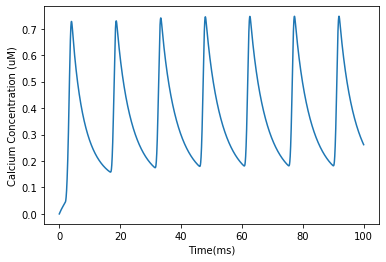

In [53]:
plt.plot(t,sol[:,57])
plt.xlabel("Time(ms)")
plt.ylabel("Calcium Concentration (uM)")
#plt.xlim(0,17)
plt.show()